# Gapminder World Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report analyses the [gapminder world dataset](https://www.gapminder.org/data/). This includes three datasets which are the [child_mortality_0_5_year_olds_dying_per_1000_born dataset](http://www.gapm.io/du5mr/), the [life_expectancy_years dataset](http://gapm.io/ilex), and the [income_per_person_gdppercapita_ppp_inflation_adjusted dataset](http://gapm.io/dgdppc).
>
>The datasets are based on three different indicators which are child mortality rate under age five (which describes Child mortality under age 5, for all countries for all years between 1800 to 2100), Life Expectancy at Birth and GDP per capita in constant PPP dollars.
>
## Research Questions
> The research questions include: </br>
    1.Have certain regions of the world been growing better than others? </br>
    2.Are there trends that can be observed between the indicators?

In [1]:
# Importing modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

> The data is divided between three csv files, one for child mortality rate under age five, one for Life Expectancy at Birth and one for GDP per capita in constant PPP dollars. First I will load each file into a DataFrame.

In [2]:
# Loading the three datasets
child_mortality_df = pd.read_csv("gap_minder/child_mortality_0_5_year_olds_dying_per_1000_born.csv")
life_expectancy_df = pd.read_csv("gap_minder/life_expectancy_years.csv")
income_df = pd.read_csv("gap_minder/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

Let's have a glossary look at the three datasets using the `.head()` function

In [3]:
child_mortality_df.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [4]:
life_expectancy_df.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [5]:
income_df.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


## Reshaping the three datasets

We have to reshape the data to make our analysis easy. The code below reshapes each of the datasets.

In [6]:
# pd.melt(child_mortality, id_vars=['country'])
child_mortality = pd.melt(child_mortality_df, id_vars=['country']) 
life_expectancy =  pd.melt(life_expectancy_df, id_vars=['country'])
income = pd.melt(income_df, id_vars=['country'])

# Let's view one of our reshaped dataset
life_expectancy.head()

,country,variable,value
0,Afghanistan,1799,28.2
1,Angola,1799,27.0
2,Albania,1799,35.4
3,Andorra,1799,NaN
4,United Arab Emirates,1799,30.7


## Renaming our columns



In [7]:
# Let's rename our columns
child_mortality.columns = ['country', 'year', 'child_mortality']
df = child_mortality
df.head()

,country,year,child_mortality
0,Afghanistan,1799,469.0
1,Angola,1799,486.0
2,Albania,1799,375.0
3,Andorra,1799,NaN
4,United Arab Emirates,1799,434.0


## Joining our datasets
In the code below, we will join the three datasets as one dataframe with the following columns: 'country', 'year', 'child mortality', 'life expectancy' and 'income'.

In [8]:
df['life_expectancy'] = life_expectancy['value']
df['income'] = income['value']
df.head()

,country,year,child_mortality,life_expectancy,income
0,Afghanistan,1799,469.0,28.2,683
1,Angola,1799,486.0,27.0,700
2,Albania,1799,375.0,35.4,755
3,Andorra,1799,NaN,NaN,1360
4,United Arab Emirates,1799,434.0,30.7,1130


### Checking for mising values and wrong datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          59297 non-null  object 
 1   year             59297 non-null  object 
 2   child_mortality  57497 non-null  float64
 3   life_expectancy  56616 non-null  float64
 4   income           48945 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.3+ MB


There are missing values in our dataset and wrong datatype. We need to investigate the income column further in order to know the specific datatype before we can convert it to an appropriate datatype.

In [10]:
type(df['income'][0])

int

In order to clean our data, we will have to drop rows with missing values.

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45599 entries, 0 to 48944
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          45599 non-null  object 
 1   year             45599 non-null  object 
 2   child_mortality  45599 non-null  float64
 3   life_expectancy  45599 non-null  float64
 4   income           45599 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


Let's check for duplicates.

In [12]:
df.duplicated().sum()

0

#### Let's convert income column to float.

In [13]:
df['income'].tail()

48940    10.7k
48941     4540
48942    19.7k
48943     5680
48944     5920
Name: income, dtype: object

#### Remove and Convert K Values in the income column

In [14]:
df["income"] = df["income"].astype("string")
df["income"]

C:\Users\USER\Anaconda3\envs\course_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          683
1          700
2          755
4         1130
5         1730
         ...  
48940    10.7k
48941     4540
48942    19.7k
48943     5680
48944     5920
Name: income, Length: 45599, dtype: string

In [15]:
len(df['income'])

45599

In [16]:
data_arr = []
for i in df["income"].values:
        if "k" in i:
            data = float(i.split("k")[0])*1000
            data_arr.append(data)
        else:
            data_arr.append(i)
len(data_arr)
df["income"] = data_arr

C:\Users\USER\Anaconda3\envs\course_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
df["income"] = df["income"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45599 entries, 0 to 48944
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          45599 non-null  object 
 1   year             45599 non-null  object 
 2   child_mortality  45599 non-null  float64
 3   life_expectancy  45599 non-null  float64
 4   income           45599 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.1+ MB


C:\Users\USER\Anaconda3\envs\course_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now that our data is clean, let's proceed with exploratory data analysis.

# Eploratory Visualizations

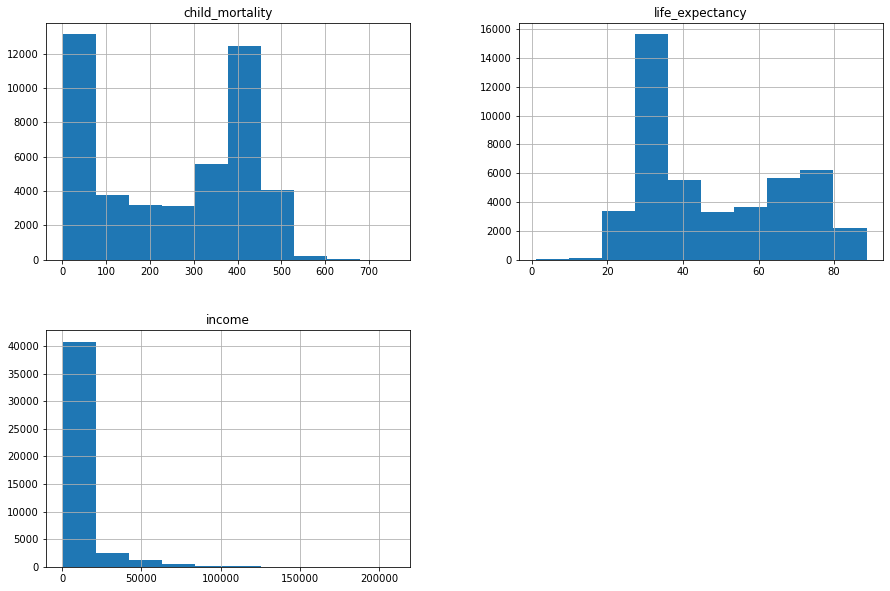

In [18]:
# Histograms for numerical features
df.hist(figsize=(15,10));

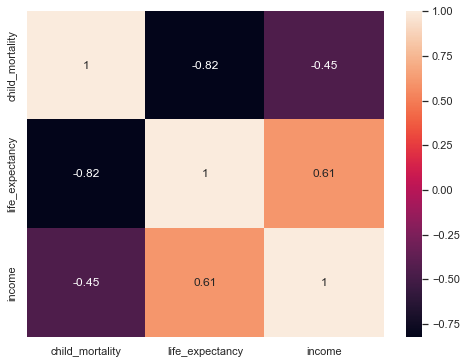

In [19]:
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

## RESEARCH QUESTION 1
Have certain regions of the world been growing better than others?

In [20]:
df.describe()

,child_mortality,life_expectancy,income
count,45599.000000,45599.000000,45599.000000
mean,251.000905,48.343234,8205.045549
std,176.639840,18.842224,16616.702151
min,0.770000,1.010000,224.000000
25%,53.500000,32.100000,1060.000000
50%,292.000000,40.200000,2050.000000
75%,414.000000,67.200000,6440.000000
max,756.000000,88.600000,209000.000000


Let's check the minimum values

In [21]:
# Sorted minimum values of the child_mortality column
df_min_values = df.groupby('country').min()
df_min_values.sort_values('child_mortality')

,year,child_mortality,life_expectancy,income
country,,,,
Finland,1799,0.77,23.9,317.0
Iceland,1799,0.84,11.4,278.0
Norway,1800,1.05,19.2,282.0
Slovenia,1799,1.09,21.9,401.0
Cyprus,1799,1.18,20.7,349.0
...,...,...,...,...
South Sudan,1799,61.40,23.3,401.0
Central African Republic,1799,64.10,12.6,384.0
Nigeria,1799,68.70,14.6,225.0


In [22]:
# Sorted minimum values of the life_expectancy column

df_min_values.sort_values('life_expectancy', ascending=False)

,year,child_mortality,life_expectancy,income
country,,,,
Monaco,1949,1.73,43.00,729.0
Dominica,1949,14.70,42.50,795.0
San Marino,1949,1.25,41.00,733.0
St. Kitts and Nevis,1949,6.97,38.40,704.0
Tuvalu,1949,16.50,38.40,531.0
...,...,...,...,...
Bosnia and Herzegovina,1799,2.82,4.19,279.0
Ukraine,1799,3.84,4.00,297.0
Peru,1800,6.10,1.50,225.0


In [23]:
# Sorted minimum values of the life_expectancy column

df_min_values.sort_values('income', ascending=False)

,year,child_mortality,life_expectancy,income
country,,,,
Palau,1949,9.93,37.40,853.0
Marshall Islands,1949,18.60,38.30,797.0
Dominica,1949,14.70,42.50,795.0
San Marino,1949,1.25,41.00,733.0
Monaco,1949,1.73,43.00,729.0
...,...,...,...,...
Peru,1800,6.10,1.50,225.0
Nigeria,1799,68.70,14.60,225.0
Palestine,1799,11.80,15.00,224.0


#### Let's check the maximum values.

In [24]:
# Sorted maximum values of the child_mortality column
df_max_values = df.groupby('country').max()
df_max_values.sort_values('child_mortality')
df_max_values

,year,child_mortality,life_expectancy,income
country,,,,
Afghanistan,2047,483.0,86.9,193000.0
Albania,2047,375.0,86.8,189000.0
Algeria,2047,460.0,85.4,188000.0
Andorra,2047,76.9,87.1,144000.0
Angola,2046,486.0,87.3,147000.0
...,...,...,...,...
Venezuela,2046,415.0,87.1,150000.0
Vietnam,2046,417.0,87.7,160000.0
Yemen,2046,540.0,86.9,157000.0


In [25]:
# Sorted maximum values of the life_expectancy column
df_max_values.sort_values('life_expectancy')
df_max_values

,year,child_mortality,life_expectancy,income
country,,,,
Afghanistan,2047,483.0,86.9,193000.0
Albania,2047,375.0,86.8,189000.0
Algeria,2047,460.0,85.4,188000.0
Andorra,2047,76.9,87.1,144000.0
Angola,2046,486.0,87.3,147000.0
...,...,...,...,...
Venezuela,2046,415.0,87.1,150000.0
Vietnam,2046,417.0,87.7,160000.0
Yemen,2046,540.0,86.9,157000.0


In [26]:
# Sorted maximum values of the income column
df_max_values.sort_values('income')
df_max_values

,year,child_mortality,life_expectancy,income
country,,,,
Afghanistan,2047,483.0,86.9,193000.0
Albania,2047,375.0,86.8,189000.0
Algeria,2047,460.0,85.4,188000.0
Andorra,2047,76.9,87.1,144000.0
Angola,2046,486.0,87.3,147000.0
...,...,...,...,...
Venezuela,2046,415.0,87.1,150000.0
Vietnam,2046,417.0,87.7,160000.0
Yemen,2046,540.0,86.9,157000.0


#### Checking for mean values

In [27]:
# General mean values
df.mean()

year                       inf
child_mortality     251.000905
life_expectancy      48.343234
income             8205.045549
dtype: float64

In [28]:
# Country-specific mean values
df.groupby('country').mean()

,child_mortality,life_expectancy,income
country,,,
Afghanistan,347.502075,48.390041,9019.630705
Albania,242.011446,48.512810,8998.958678
Algeria,302.962656,47.543568,8417.294606
Andorra,15.019175,67.043299,16605.041237
Angola,353.641322,47.602893,7902.723140
...,...,...,...
Venezuela,241.429167,48.531250,8828.295833
Vietnam,257.659504,47.649174,7767.256198
Yemen,381.490417,48.352917,8543.604167


### Let's check if the mean value of a country is higher than the mean value of all the country

This requires a function that returns a boolean

In [29]:
# Writing a function
# The function returns True if the mean value of a country is greater than
# the mean value of all the countries and stores the result in dataframe.


def countrymean_vs_wholedatasetmean(dataframe, column_in_quotation_marks):
    whole_dataset_mean = dataframe[column_in_quotation_marks].mean()
    country_mean_df = dataframe.groupby('country').mean()
    country_mean = np.array(country_mean_df[column_in_quotation_marks])
    checklist = []
    for mean in country_mean:
        if mean >= whole_dataset_mean:
            checklist.append(True) 
        else:
            checklist.append(False)
    country_mean_table = country_mean_df
    country_mean_table[column_in_quotation_marks + "_" + 'mean_grade'] = checklist
    return country_mean_table
    

In [30]:
child_mortality_table = countrymean_vs_wholedatasetmean(df, 'child_mortality')
child_mortality_table

,child_mortality,life_expectancy,income,child_mortality_mean_grade
country,,,,
Afghanistan,347.502075,48.390041,9019.630705,True
Albania,242.011446,48.512810,8998.958678,False
Algeria,302.962656,47.543568,8417.294606,True
Andorra,15.019175,67.043299,16605.041237,False
Angola,353.641322,47.602893,7902.723140,True
...,...,...,...,...
Venezuela,241.429167,48.531250,8828.295833,False
Vietnam,257.659504,47.649174,7767.256198,True
Yemen,381.490417,48.352917,8543.604167,True


In [31]:
life_expectancy_table = countrymean_vs_wholedatasetmean(df, 'life_expectancy')
life_expectancy_table

,child_mortality,life_expectancy,income,life_expectancy_mean_grade
country,,,,
Afghanistan,347.502075,48.390041,9019.630705,True
Albania,242.011446,48.512810,8998.958678,True
Algeria,302.962656,47.543568,8417.294606,False
Andorra,15.019175,67.043299,16605.041237,True
Angola,353.641322,47.602893,7902.723140,False
...,...,...,...,...
Venezuela,241.429167,48.531250,8828.295833,True
Vietnam,257.659504,47.649174,7767.256198,False
Yemen,381.490417,48.352917,8543.604167,True


In [32]:
income_table = countrymean_vs_wholedatasetmean(df, 'income')
income_table

,child_mortality,life_expectancy,income,income_mean_grade
country,,,,
Afghanistan,347.502075,48.390041,9019.630705,True
Albania,242.011446,48.512810,8998.958678,True
Algeria,302.962656,47.543568,8417.294606,True
Andorra,15.019175,67.043299,16605.041237,True
Angola,353.641322,47.602893,7902.723140,False
...,...,...,...,...
Venezuela,241.429167,48.531250,8828.295833,True
Vietnam,257.659504,47.649174,7767.256198,False
Yemen,381.490417,48.352917,8543.604167,True


## Joining our dataframes

In [33]:
wholedataset_table = child_mortality_table
wholedataset_table['L_E_mean_grade'] = life_expectancy_table['life_expectancy_mean_grade']
wholedataset_table['income_mean_grade'] = income_table['income_mean_grade']
wholedataset_table.head()

,child_mortality,life_expectancy,income,child_mortality_mean_grade,L_E_mean_grade,income_mean_grade
country,,,,,,
Afghanistan,347.502075,48.390041,9019.630705,True,True,True
Albania,242.011446,48.512810,8998.958678,False,True,True
Algeria,302.962656,47.543568,8417.294606,True,False,True
Andorra,15.019175,67.043299,16605.041237,False,True,True
Angola,353.641322,47.602893,7902.723140,True,False,False


In [34]:
# Number of countries with low child mortality rate
low_child_mortality = wholedataset_table[wholedataset_table['child_mortality_mean_grade'] == False]
low_child_mortality.shape[0]

92

In [35]:
# Number of countries with high life expectancy
high_life_xpectancy = wholedataset_table[wholedataset_table['L_E_mean_grade'] == True]
high_life_xpectancy.shape[0]

33

In [36]:
# Number of countries with high income per GDP
high_income = wholedataset_table[wholedataset_table['income_mean_grade'] == True]
high_income.shape[0]

67

In [37]:
# Number of countries with low child mortality rate and high life expectancy
very_good_countries1 = low_child_mortality[low_child_mortality['L_E_mean_grade'] == True]
very_good_countries1.shape[0]

21

In [38]:
# Number of countries with low child mortality rate and high income
very_good_countries2 = low_child_mortality[low_child_mortality['income_mean_grade'] == True]
very_good_countries2.shape[0]

37

In [39]:
# Number of countries with high life expectancy and high income
very_good_countries3 = high_life_xpectancy[high_life_xpectancy['income_mean_grade'] == True]
very_good_countries3.shape[0]

32

In [40]:
# Number of countries with low child mortality rate, high life expectancy and high income
best_countries = very_good_countries3[very_good_countries3['child_mortality_mean_grade'] == False]
best_countries.shape[0]

21

In [41]:
# Number of countries with high child mortality rate, low life expectancy and low income
high_mortality = wholedataset_table[wholedataset_table['child_mortality_mean_grade'] == True]
low_life_expectancy_high_mortality = high_mortality[high_mortality['L_E_mean_grade'] == False]
worst_countries = low_life_expectancy_high_mortality[low_life_expectancy_high_mortality['income_mean_grade'] == False]
worst_countries.shape[0]

74

From the foregoing, it is clear that certain regions of the world have been growing better than others. 21 countries did excellently well when compared to other countries using the three indicators chosen for this analysis. These are the countries whose child mortality rate is lower than the average child mortality rate across all countries. Their life expectancy and income per gdp are higher than the average life expectancy and income per gdp across countries.

However, 74 countries did not do well at all. These are the countries whose child mortality rate is higher than the average child mortality rate across all countries. Their life expectancy and income per gdp are lower than the average life expectancy and income per gdp across countries.

In [42]:
#countries with low child mortality rate, high life expectancy and high income
best_countries

,child_mortality,life_expectancy,income,child_mortality_mean_grade,L_E_mean_grade,income_mean_grade
country,,,,,,
Albania,242.011446,48.512810,8998.958678,False,True,True
Andorra,15.019175,67.043299,16605.041237,False,True,True
Dominica,47.152577,67.590722,18621.103093,False,True,True
Holy See,60.199167,67.776042,17332.645833,False,True,True
"Hong Kong, China",16.876354,67.722917,17661.645833,False,True,True
Liechtenstein,17.278947,67.041053,16011.863158,False,True,True
Marshall Islands,56.638542,67.122917,15304.020833,False,True,True
Monaco,7.381429,67.732653,16678.030612,False,True,True
Nauru,58.643878,67.528571,16588.081633,False,True,True


In [43]:
# countries with high child mortality rate, low life expectancy and low income
worst_countries

,child_mortality,life_expectancy,income,child_mortality_mean_grade,L_E_mean_grade,income_mean_grade
country,,,,,,
Angola,353.641322,47.602893,7902.723140,True,False,False
Bahrain,279.202769,47.532231,7937.049587,True,False,False
Bangladesh,348.895041,47.621901,7853.000000,True,False,False
Barbados,323.302500,47.946250,7590.804167,True,False,False
Benin,320.071488,47.427686,7835.388430,True,False,False
...,...,...,...,...,...,...
Thailand,268.603678,47.464050,7672.483471,True,False,False
Tunisia,301.545537,47.621488,8063.830579,True,False,False
Turkmenistan,296.577273,47.504545,7938.446281,True,False,False


## RESEARCH QUESTION 2
Are there trends that can be observed between the indicators?

In [44]:
df.head()

,country,year,child_mortality,life_expectancy,income
0,Afghanistan,1799,469.0,28.2,683.0
1,Angola,1799,486.0,27.0,700.0
2,Albania,1799,375.0,35.4,755.0
4,United Arab Emirates,1799,434.0,30.7,1130.0
5,Argentina,1799,402.0,33.2,1730.0


#### Looking for correlation

## Relationship between child mortality and life expectancy

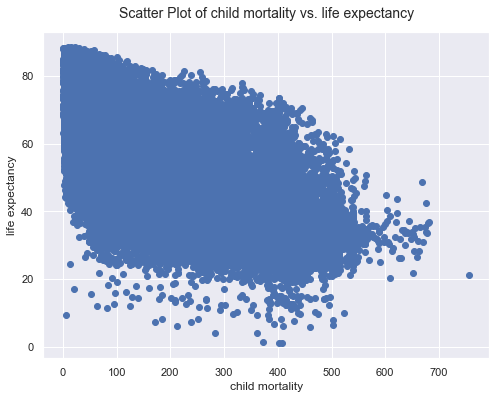

In [45]:
# Scatter plot of child_mortality vs. life_expectancy
plt.figure(figsize = [8, 6])
plt.scatter(df['child_mortality'] , df['life_expectancy'])
plt.title('Scatter Plot of child mortality vs. life expectancy', fontsize=14, y=1.025)
plt.xlabel('child mortality')
plt.ylabel('life expectancy')
plt.show()

There is a negative correlation between life expectancy and child mortality: As child mortality decreases, life expectancy increases. This makes sense absolutely.

## Relationship between child mortality and income

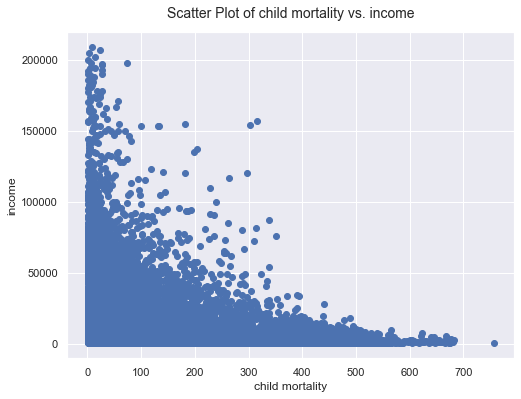

In [46]:
# Scatter plot of child_mortality vs. income
plt.figure(figsize = [8, 6])
plt.scatter(df['child_mortality'] , df['income'])
plt.title('Scatter Plot of child mortality vs. income', fontsize=14, y=1.025)
plt.xlabel('child mortality')
plt.ylabel('income')
plt.show()

There is a negative correlation between income and child mortality: As income increases, child mortality decreases. This makes sense too.

## Relationship between life expectancy and income

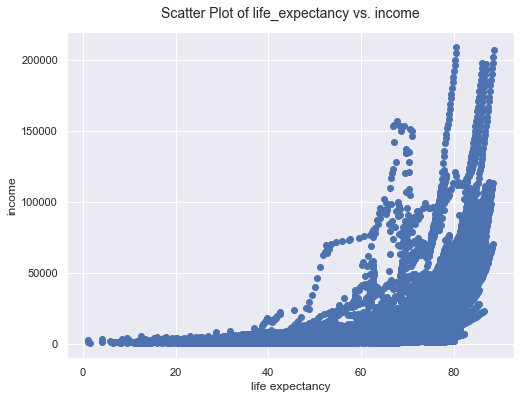

In [47]:
# Scatter plot of life_expectancy vs. income
plt.figure(figsize = [8, 6])
plt.scatter(df['life_expectancy'] , df['income'])
plt.title('Scatter Plot of life_expectancy vs. income', fontsize=14, y=1.025)
plt.xlabel('life expectancy')
plt.ylabel('income')
plt.show()

There is a positive correlation between income and life expectancy: As income increases, life expectancy also increases. This makes perfect sense.

# Conclusion

This report examined a dataset from gapminder world which included the child_mortality_0_5_year_olds_dying_per_1000_born dataset, the life_expectancy_years dataset, and the income_per_person_gdppercapita_ppp_inflation_adjusted dataset.

Three indicators were used to investigate:
<ul>
<li>whether certain regions of the world have been growing better than others;</li>
<li>there are trends that can be observed between the indicators.</li>
</ul>

This analysis found out that:
<ul>
<li>Certain regions of the world have been growing better than others.</li>
<li>There is a negative correlation between life expectancy and child mortality: As child mortality decreases, life expectancy increases.</li>
<li>There is a negative correlation between income and child mortality: As income increases, child mortality decreases.</li>
<li>There is a positive correlation between income and life expectancy: As income increases, life expectancy also increases.</li>
</ul>

# Limitations

This analysis only used three indicators to judge whether or not some regions of the world have performed better than others. It is important to note that such an analysis requires more than three indicators. 

Secondly, this analysis made use of mean values in finding out which regions have performed well or badly. Using minimum values or maximum values for the analysis might result in different outcomes.

## References
 N/A